# Clustering Price
In this notebook we will do cluster of our processed data and see how it works if worthless or not.

In [7]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.cluster import KMeans

# Configurations
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

# Load data
df = pd.read_csv('../data/processed/rent_Valencia.csv', index_col=0)

# Transform cluster to categorical
df['cluster'] = df['cluster'].map({0: 'central', 1: 'south', 2: 'north', 3: 'west'})

df.head()

,price,numPhotos,floor,rooms,bathrooms,size,parkingSpacePrice,exterior,renew,new_development,hasParkingSpace,isParkingSpaceIncludedInPrice,isFinished,hasLift,hasPlan,has360,has3DTour,hasVideo,propertyType,cluster
propertyCode,,,,,,,,,,,,,,,,,,,,
97942302,850.0,23,0,5,2,140.0,0.0,False,False,False,False,False,True,False,False,False,False,False,countryHouse,west
97956954,900.0,18,1,3,3,100.0,0.0,True,False,False,True,True,True,True,False,False,False,False,duplex,central
98200619,1200.0,26,2,3,2,145.0,0.0,True,False,False,False,False,True,True,False,False,False,False,flat,central
98015046,1800.0,21,0,3,2,103.0,0.0,True,False,False,False,False,True,True,False,False,False,True,flat,central
97530419,850.0,27,5,3,1,76.0,0.0,False,False,False,False,False,True,True,False,False,False,True,flat,central


In [8]:
# Preprocess categorical data
df = pd.get_dummies(df, columns=['cluster', 'propertyType'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4168 entries, 97942302 to 97996918
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   price                          4168 non-null   float64
 1   numPhotos                      4168 non-null   int64  
 2   floor                          4168 non-null   int64  
 3   rooms                          4168 non-null   int64  
 4   bathrooms                      4168 non-null   int64  
 5   size                           4168 non-null   float64
 6   parkingSpacePrice              4168 non-null   float64
 7   exterior                       4168 non-null   bool   
 8   renew                          4168 non-null   bool   
 9   new_development                4168 non-null   bool   
 10  hasParkingSpace                4168 non-null   bool   
 11  isParkingSpaceIncludedInPrice  4168 non-null   bool   
 12  isFinished                     4168 n

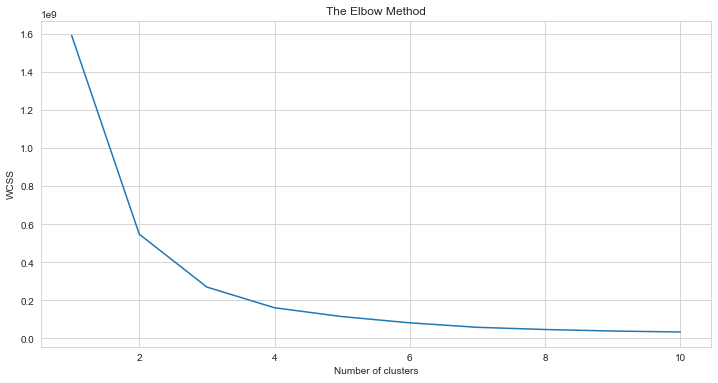

In [9]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is no clear answer to how many clusters we should use. We will use 3 to start with and see how it works.

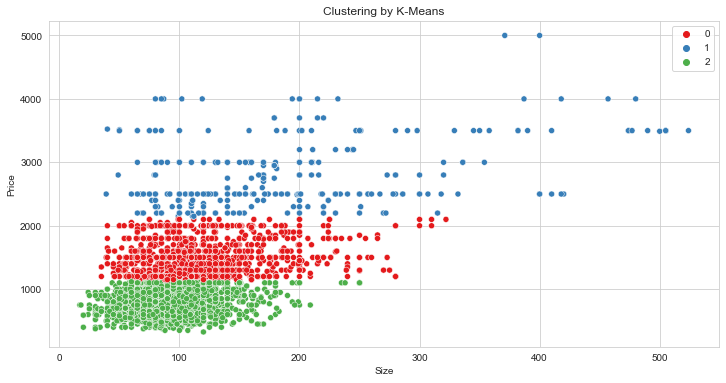

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df)

# Plot the clusters (Price vs Size) 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='size', y='price', hue=y_kmeans, data=df, palette='Set1')
plt.title('Clustering by K-Means')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In this graph we can see that the kmeans algorithm is clustering the data into a group of 3 different prices between 0 and 1000, 1000 - 2000 and 2000 - 5000. Let's see how it works with 4 clusters.

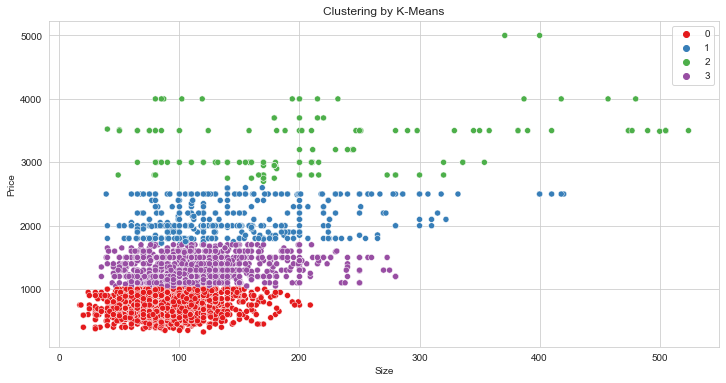

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df)

# Plot the clusters (Price vs Size) 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='size', y='price', hue=y_kmeans, data=df, palette='Set1')
plt.title('Clustering by K-Means')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

So it almost the same as in the previous graph, but with four groups. Seems that the size its not influent on the clusters.

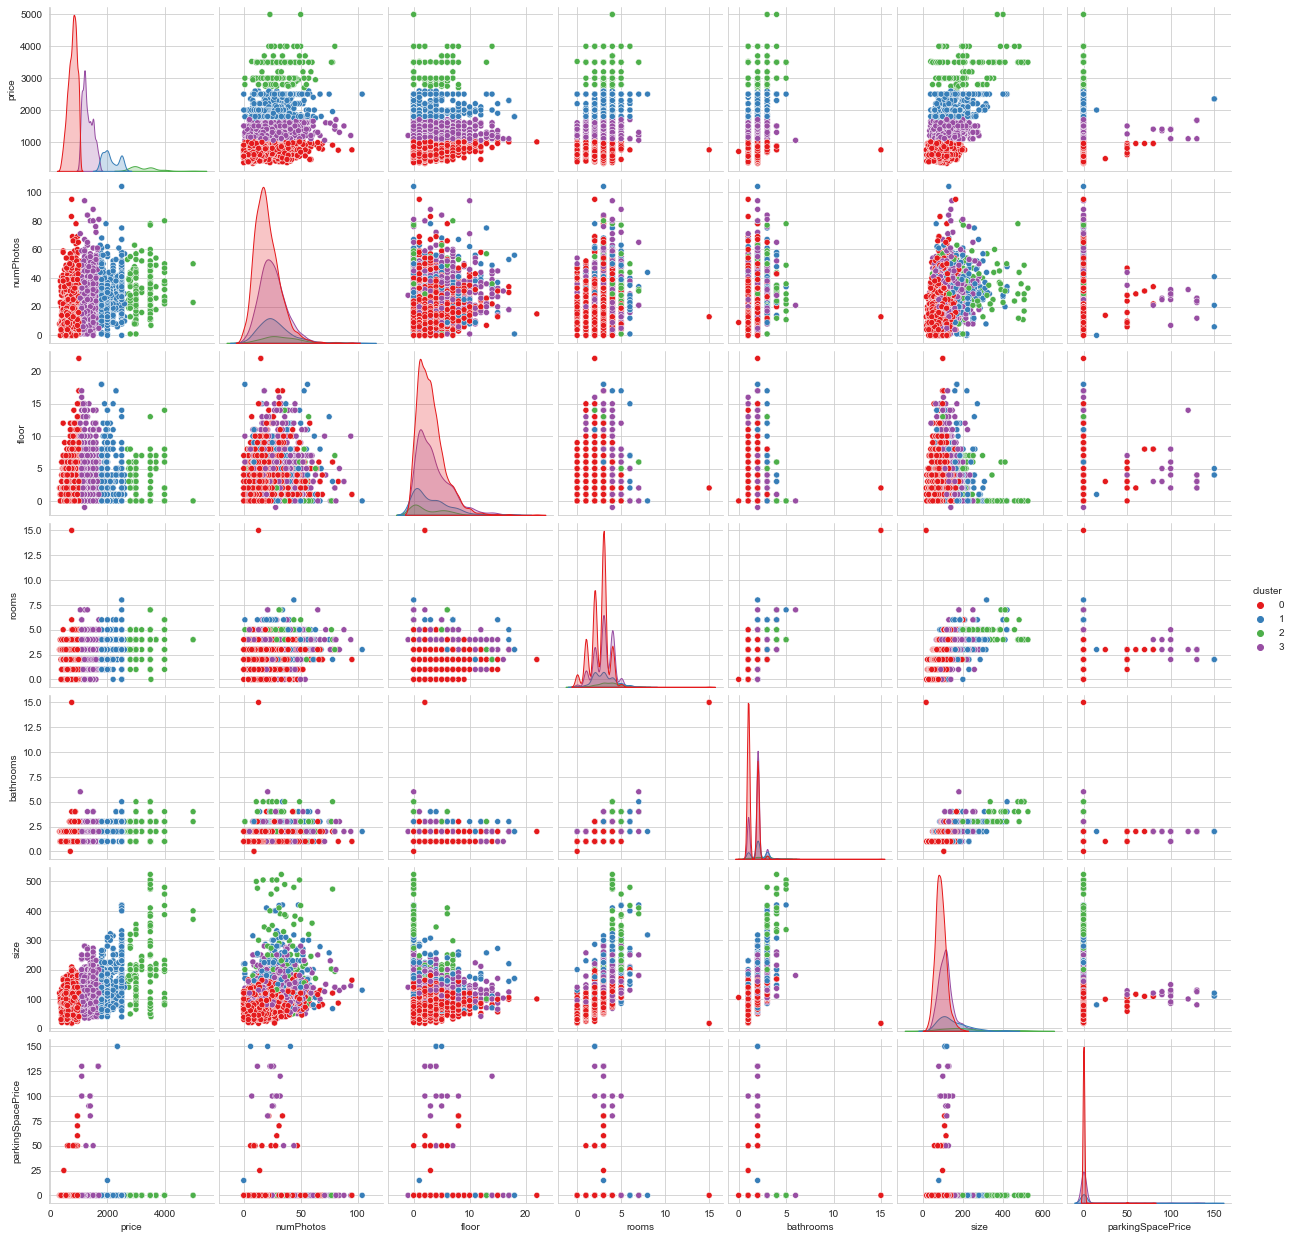

In [12]:
col_num = df.select_dtypes(include=['int64', 'float64']).columns
df_num = df[col_num].reset_index(drop=True)
df_num['cluster'] = y_kmeans

sns.pairplot(df_num, hue='cluster', palette='Set1')
plt.show()

So in the prices it clearly shows the differences of the clusters. So the kmeans algorithm is clustering by the price. This could be a good solution for the normality problem that we have before.